In [4]:
from skimage.transform import resize
from nilearn import plotting
import nibabel as nib
import numpy as np
import torch
import ipdb
import csv
import os
import re

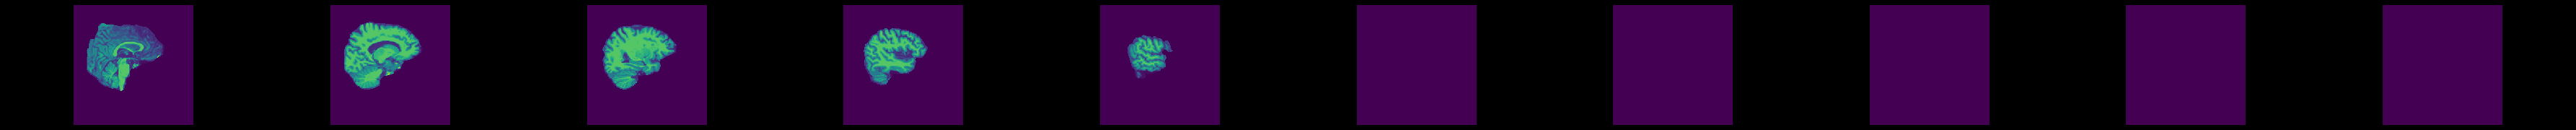

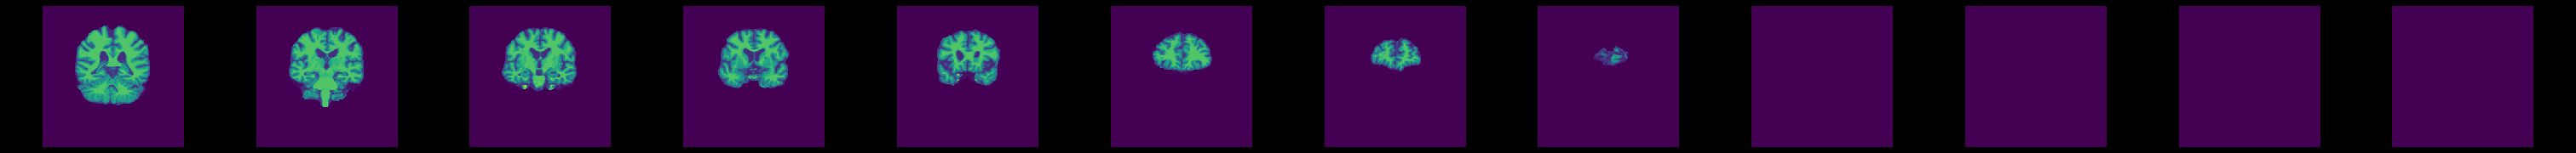

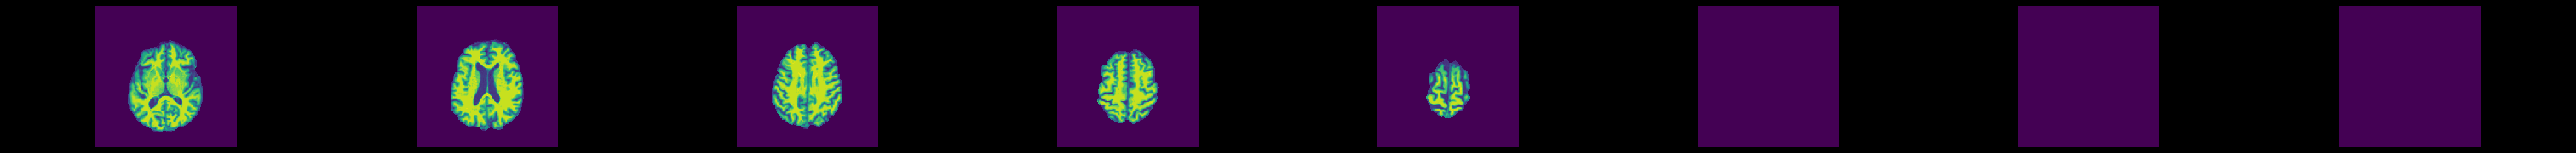

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 137
27 447
28 1230
29 1770
30 2125
31 2537
32 2900
33 3249
34 3589
35 4019
36 4483
37 4877
38 5261
39 5612
40 6060
41 6488
42 6872
43 7229
44 7557
45 7880
46 8183
47 8475
48 8781
49 9086
50 9426
51 9754
52 10148
53 10508
54 10852
55 11162
56 11455
57 11723
58 11989
59 12228
60 12469
61 12714
62 12949
63 13198
64 13454
65 13696
66 13910
67 14120
68 14266
69 14403
70 14554
71 14679
72 14801
73 14951
74 15098
75 15247
76 15415
77 15557
78 15690
79 15816
80 15912
81 16018
82 16084
83 16140
84 16182
85 16206
86 16221
87 16248
88 16245
89 16215
90 16185
91 16129
92 16084
93 16000
94 15923
95 15831
96 15744
97 15651
98 15573
99 15496
100 15415
101 15320
102 15211
103 15084
104 14917
105 14762
106 14594
107 14418
108 14189
109 13940
110 13603
111 13338
112 13139
113 13006
114 12898
115 12803
116 12720
117 12645
118 12547
119 12463
120 12344
121 12126
122 11991
123 11885
12

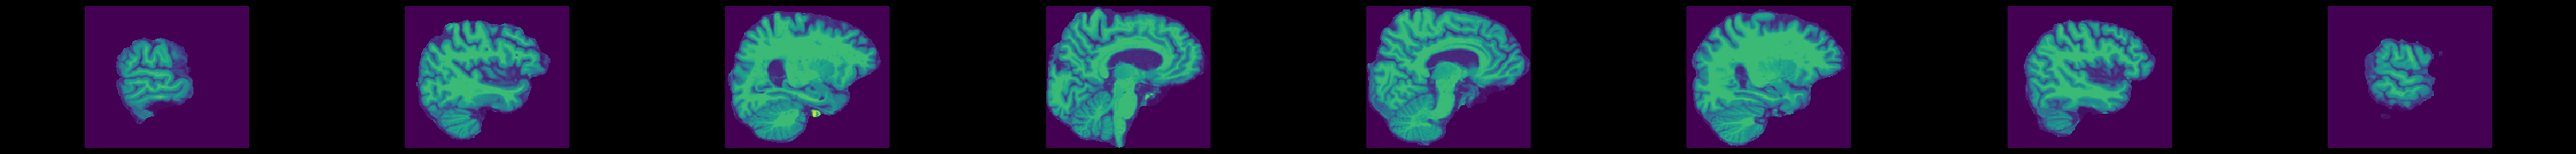

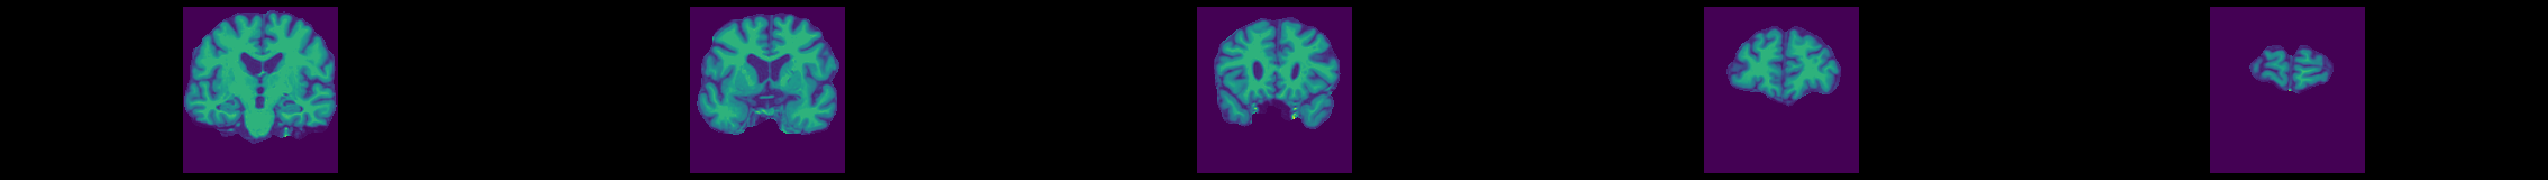

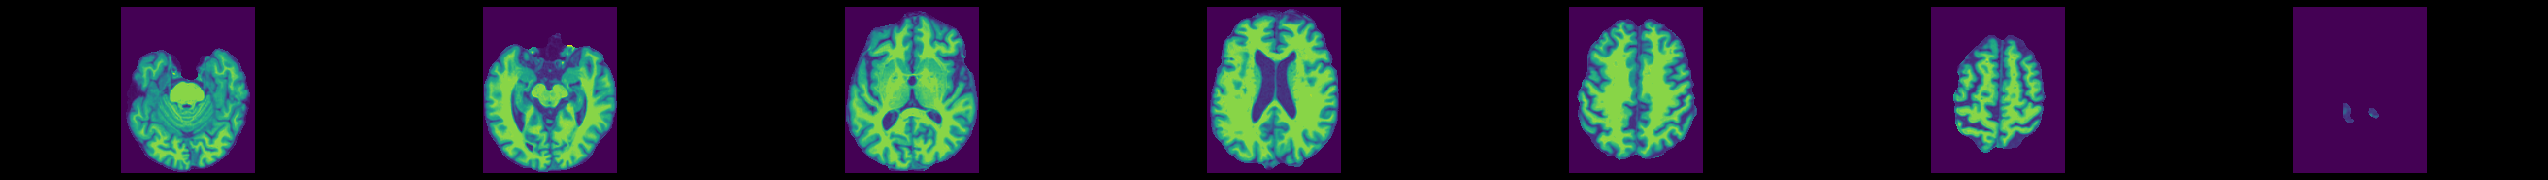

In [17]:
arr = range(0, 256, 14)
path = '../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/S13408/mri'
mgz_path = rf'{path}/brainmask.mgz'
nii_path = rf'{path}/test_image.nii'
padding = 0

img = nib.load(mgz_path)
np_img = np.array(img.get_fdata())
plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='x')
plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='y')
plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='z')
plotting.show()
arr = range(0, img.shape[0], img.shape[0] // 15)

# clean X 
x_len, y_len, z_len = len(np_img), len(np_img[0]), len(np_img[0, 0])
zero_mask = np.zeros((y_len, z_len)) 
del_inds = []
for i in range(x_len):
    if np.sum(np_img[i] != zero_mask) == 0:
        del_inds.append(i)
np_img = np.delete(np_img, del_inds, 0)
# add paddings
np_img = np.insert(np_img, [0 for i in range(padding)], zero_mask, 0)
np_img = np.insert(np_img, [len(np_img) for i in range(padding)], zero_mask, 0)

# clean Y
x_len, y_len, z_len = len(np_img), len(np_img[0]), len(np_img[0, 0])
zero_mask = np.zeros((x_len, z_len)) 
del_inds = []
for i in range(y_len):
    if np.sum(np_img[:, i] != zero_mask) == 0:
        del_inds.append(i)
np_img = np.delete(np.swapaxes(np_img, 0, 1), del_inds, 0)
np_img = np.swapaxes(np_img, 0, 1)
# add paddings
np_img = np.insert(np_img, [0 for i in range(padding)], np.zeros(z_len), 1)
np_img = np.insert(np_img, [len(np_img[0]) for i in range(padding)], np.zeros(z_len), 1)

# # clean Z
x_len, y_len, z_len = len(np_img), len(np_img[0]), len(np_img[0, 0])
zero_mask = np.zeros((x_len, y_len)) 
del_inds = []
for i in range(z_len):
    if np.sum(np_img[:, :, i] != zero_mask) == 0:
        del_inds.append(i)
np_img = np.delete(np.swapaxes(np_img, 0, 2), del_inds, 0)
np_img = np.swapaxes(np_img, 0, 2)
# add paddings
np_img = np.insert(np_img, [0 for i in range(padding)], 0, 2)
np_img = np.insert(np_img, [len(np_img[0][0]) for i in range(padding)], 0, 2)
    
# write to disk
feat = nib.Nifti1Image(np_img, img.affine)
nib.save(feat, nii_path)

plotting.plot_img(feat,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='x')
plotting.plot_img(feat,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='y')
plotting.plot_img(feat,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='z')
plotting.show()

In [7]:
rm '../ADNI/002_S_0782/FreeSurfer_Cross-Sectional_Processing_brainmask/2007-04-11_08_07_06.0/S29564/mri/test_image.nii'

rm: cannot remove '../ADNI/002_S_0782/FreeSurfer_Cross-Sectional_Processing_brainmask/2007-04-11_08_07_06.0/S29564/mri/test_image.nii': No such file or directory
